In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sms = pd.read_csv('spam.csv')

In [4]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...,NaN,NaN,NaN
5306,ham,Ill be at yours in about 3 mins but look out f...,NaN,NaN,NaN
5320,ham,But we havent got da topic yet rite?,NaN,NaN,NaN
2403,ham,Jesus christ bitch I'm trying to give you drug...,NaN,NaN,NaN
2435,ham,Oh ya ya. I remember da. .,NaN,NaN,NaN


In [6]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## as in columns 2,3,4 most of the values are null so we will drop them

In [8]:
sms.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
sms.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
## as v1 has only two unique values so we will encode it

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
sms['v1'] = encoder.fit_transform(sms['v1'])

In [16]:
sms.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
sms.rename(columns = {'v1' : 'spam_or_not' , 'v2' : 'message'},inplace = True)

In [18]:
sms.sample(5)

,spam_or_not,message
3837,0,Went to pay rent. So i had to go to the bank t...
3230,0,No plm i will come da. On the way.
1951,0,Haha... Really oh no... How? Then will they de...
3672,0,Moji just informed me that you saved our lives...
727,0,"Alright omw, gotta change my order to a half8th"


In [19]:
sms.shape

(5572, 2)

In [20]:
sms.isnull().sum()

spam_or_not    0
message        0
dtype: int64

In [21]:
sms.duplicated().sum()

403

In [22]:
sms.drop_duplicates(inplace = True)

In [23]:
sms.duplicated().sum()

0

In [24]:
## now we will visualize the data for analysis

In [25]:
sms['spam_or_not'].value_counts()

0    4516
1     653
Name: spam_or_not, dtype: int64

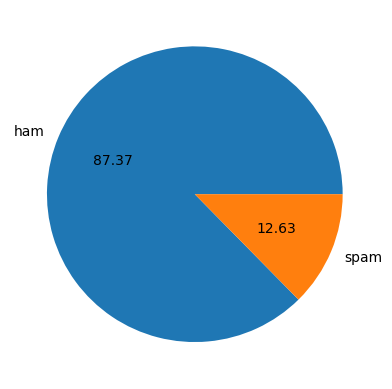

In [26]:
plt.pie(sms['spam_or_not'].value_counts(),labels = ['ham','spam'],autopct = '%.2f')
plt.show()

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yatin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
## we will be calculating here the number of characters and number of words and
## number of sentences used inside the sms for better understanding the data

In [30]:
sms['no_of_char'] = sms['message'].apply(len)

In [31]:
sms.head()

,spam_or_not,message,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
sms['no_of_words'] = sms['message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [33]:
sms.head()

,spam_or_not,message,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
sms['no_of_sent'] = sms['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [35]:
sms.head()

,spam_or_not,message,no_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
sms[['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.453279,1.947185
std,58.236795,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
## now we will try to see what are differneces between ham and spam messages

In [38]:
sms[sms['spam_or_not'] == 0][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.120903,1.799601
std,56.358868,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [39]:
sms[sms['spam_or_not'] == 1][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [40]:
## so spam messages are generally bigger than ham messages

In [41]:
import seaborn as sns

In [42]:
sms[sms['spam_or_not'] == 0]['no_of_char']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: no_of_char, Length: 4516, dtype: int64

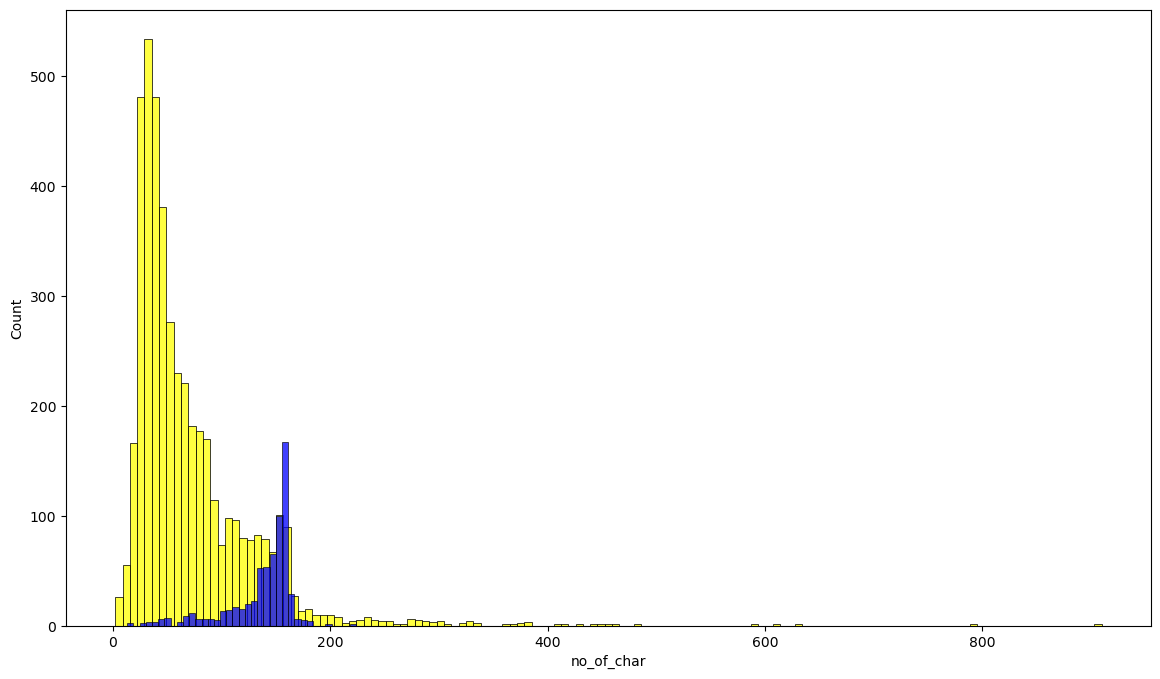

In [43]:
plt.figure(figsize = (14,8))
sns.histplot(sms[sms['spam_or_not'] == 0]['no_of_char'],color = 'yellow')
sns.histplot(sms[sms['spam_or_not'] == 1]['no_of_char'],color = 'blue')
plt.show()

In [44]:
## so we can see most of the spam messages are moade of more no of characters

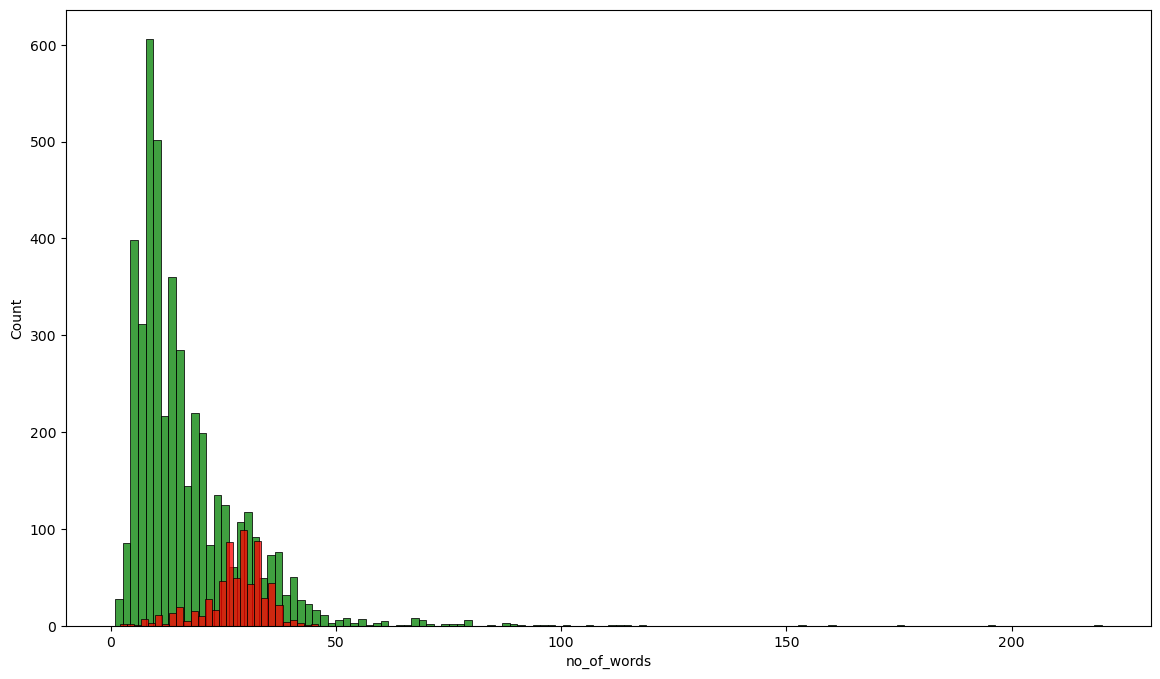

In [45]:
plt.figure(figsize = (14,8))
sns.histplot(sms[sms['spam_or_not'] == 0]['no_of_words'],color = 'green')
sns.histplot(sms[sms['spam_or_not'] == 1]['no_of_words'],color = 'red')
plt.show()

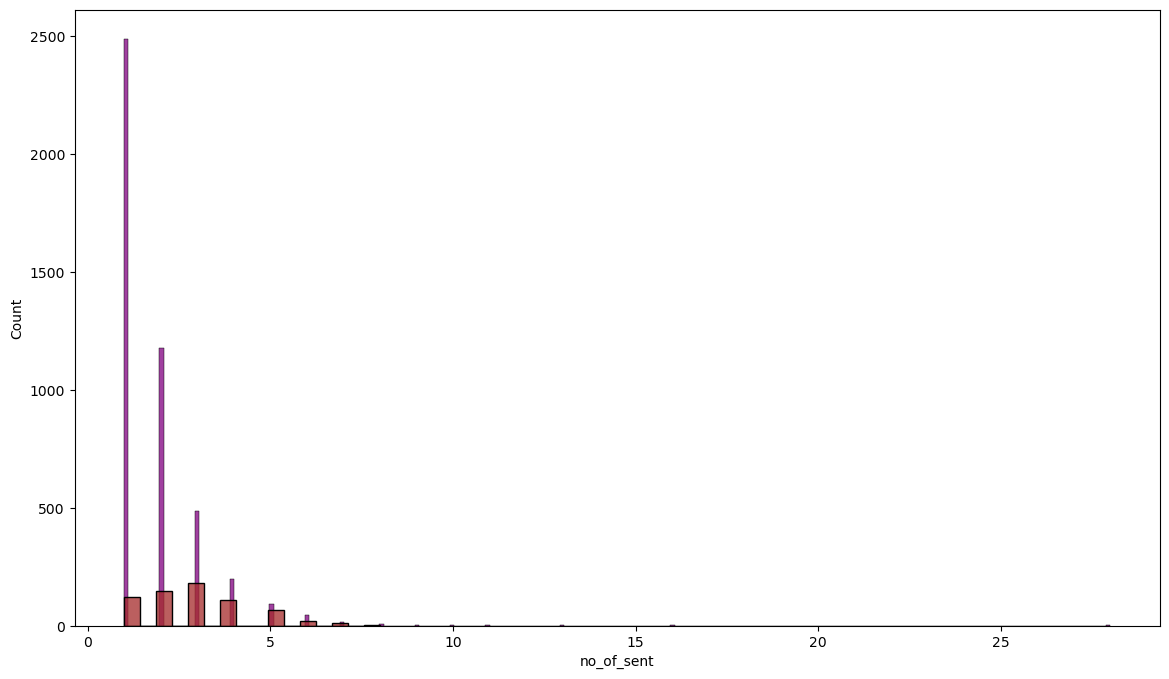

In [46]:
plt.figure(figsize = (14,8))
sns.histplot(sms[sms['spam_or_not'] == 0]['no_of_sent'],color = 'purple')
sns.histplot(sms[sms['spam_or_not'] == 1]['no_of_sent'],color = 'brown')
plt.show()

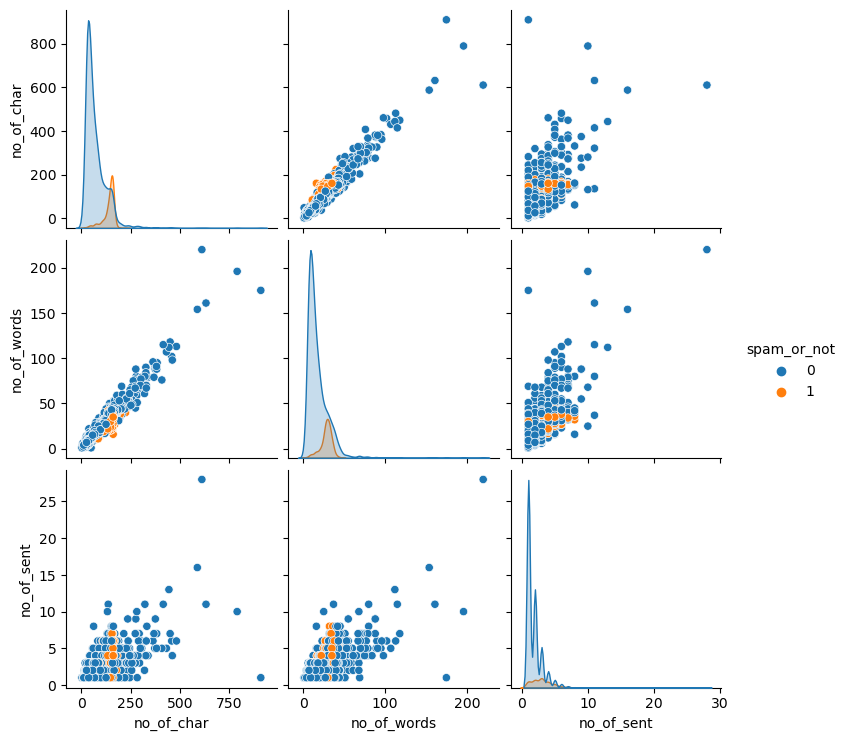

In [47]:
sns.pairplot(sms,hue = 'spam_or_not')

In [48]:
## as there are so many outliers in the dataset so we have to deal with it

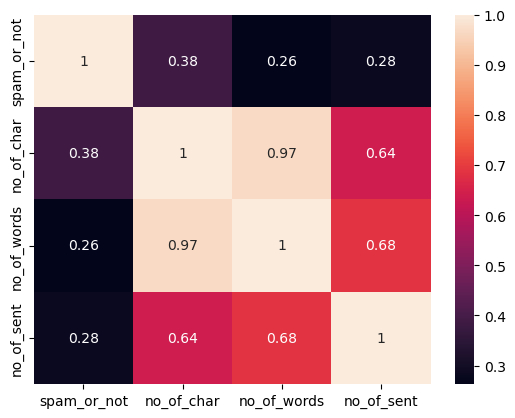

In [49]:
sns.heatmap(sms.corr(),annot = True)
plt.show()

In [50]:
## as no_of_char,no_of_word,_no_sent are highly correlated so we have to keep
## only one among these three for predictions because highly correlated data
## will not bring any new information but increases variance and time complexit
## of model and no_of_char is mostly related to spam_or_not so we will take it

In [51]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [52]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [53]:
def transform_data(message) :
    message = message.lower()
    message = nltk.word_tokenize(message)
    y = []
    for i in message :
        if i.isalnum() :
            y.append(i)
    message = y[:]
    y.clear()
    for i in message :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()
    for i in message :
        y.append(ps.stem(i))
    return " ".join(y)

In [54]:
transform_data('HI I AM WATCHING CRICKET? AND KING KOHLI IS BACK IN HIS FORM#@<')

'hi watch cricket king kohli back form'

In [55]:
sms['transformed_message'] = sms['message'].apply(transform_data)

In [56]:
sms.sample(5)

,spam_or_not,message,no_of_char,no_of_words,no_of_sent,transformed_message
1952,0,Nah im goin 2 the wrks with j wot bout u?,41,12,1,nah im goin 2 wrk j wot bout u
1264,0,I will see in half an hour,26,7,1,see half hour
4386,0,S.i'm watching it in live..,27,7,1,watch live
1336,0,"Sweet, we may or may not go to 4U to meet carl...",82,20,1,sweet may may go 4u meet carlo gaug patti inte...
4050,0,"Motivate Behind every darkness, there is a shi...",153,30,2,motiv behind everi dark shine light wait find ...


In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
from wordcloud import WordCloud

In [59]:
wc = WordCloud(width = 1000,height = 1000,background_color='black')

In [60]:
spam_wc = wc.generate(sms[sms['spam_or_not'] == 1]['transformed_message'].str.cat(sep=" "))

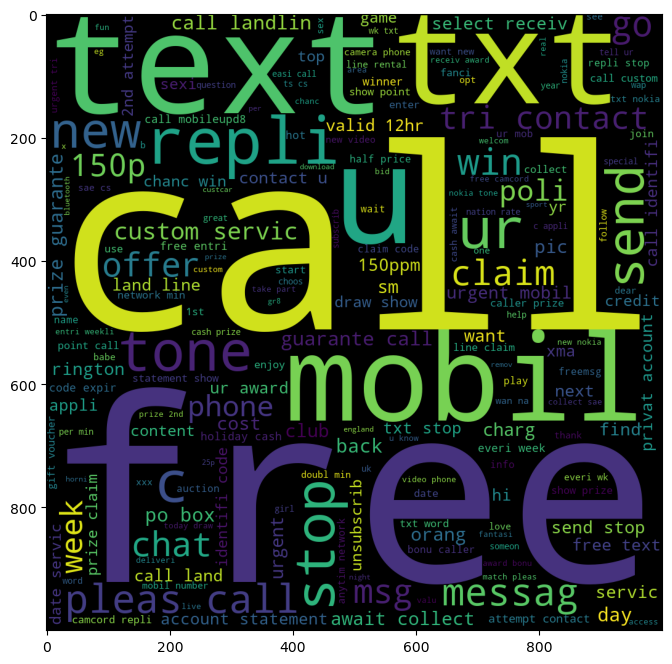

In [61]:
plt.figure(figsize = (14,8))
plt.imshow(spam_wc)

In [62]:
ham_wc = wc.generate(sms[sms['spam_or_not'] == 0]['transformed_message'].str.cat(sep = " "))

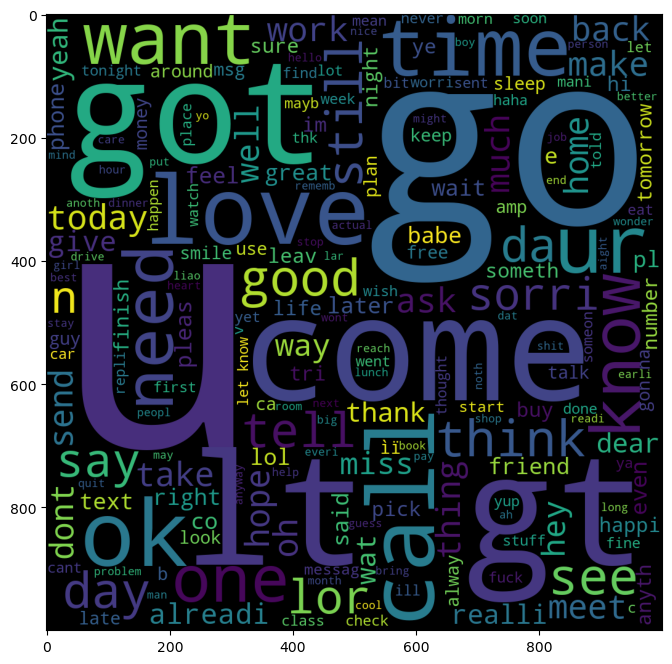

In [63]:
plt.figure(figsize = (14,8))
plt.imshow(ham_wc)

In [64]:
## now we will find top 50 words used in spam messages

In [65]:
spam_list = sms[sms['spam_or_not'] == 1]['transformed_message'].tolist()

In [66]:
top_spam_word = []
for s in spam_list :
    for word in s.split() :
        top_spam_word.append(word)

In [67]:
top_spam_word

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [68]:
from collections import Counter

In [69]:
Counter(top_spam_word).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [70]:
df1 = pd.DataFrame(Counter(top_spam_word).most_common(50))

In [71]:
## so these are 50 most common words used in spam messages

In [72]:
## now we will find 50 most common words used in hm messages

In [73]:
ham_list = sms[sms['spam_or_not'] == 0]['transformed_message'].tolist()

In [74]:
top_ham_word = []
for s1 in ham_list :
    for word in s1.split() :
        top_ham_word.append(word)

In [75]:
top_ham_word

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [76]:
Counter(top_ham_word).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

In [77]:
df2= pd.DataFrame(Counter(top_ham_word).most_common(50))

In [78]:
## these are 50 most common words used in ham messages

C:\Users\yatin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


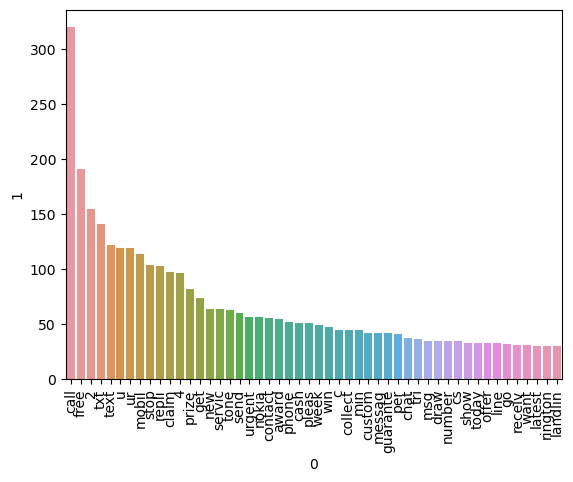

In [79]:
sns.barplot(df1[0],df1[1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\yatin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


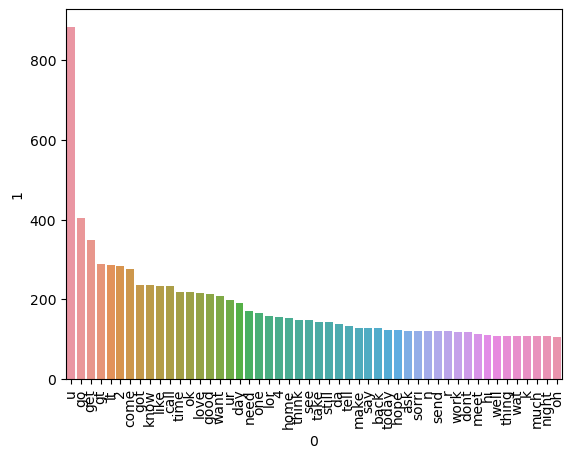

In [80]:
sns.barplot(df2[0],df2[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [82]:
tf = TfidfVectorizer()

In [83]:
X = tf.fit_transform(sms['transformed_message']).toarray()

In [84]:
Y = sms['spam_or_not'].values

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [89]:
ypred1 = gnb.predict(X_test)

In [90]:
ypred1

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
print(accuracy_score(Y_test,ypred1))
print(confusion_matrix(Y_test,ypred1))
print(precision_score(Y_test,ypred1))

0.8856106408706167
[[3278  342]
 [ 131  384]]
0.5289256198347108


In [92]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [93]:
ypred2 = mnb.predict(X_test)

In [94]:
print(accuracy_score(Y_test,ypred2))
print(confusion_matrix(Y_test,ypred2))
print(precision_score(Y_test,ypred2))

0.9013301088270859
[[3620    0]
 [ 408  107]]
1.0


In [95]:
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)

BernoulliNB()

In [96]:
ypred3 = bnb.predict(X_test)

In [97]:
print(accuracy_score(Y_test,ypred3))
print(confusion_matrix(Y_test,ypred3))
print(precision_score(Y_test,ypred3))

0.8800483675937122
[[3618    2]
 [ 494   21]]
0.9130434782608695


In [98]:
##as here data is imbalanced so we will give more importance to precision score
##so we will use MultinomialNB

In [99]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [102]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [103]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9552599758162031
Precision -  0.9296875
For  KN
Accuracy -  0.9426844014510278
Precision -  0.9664429530201343
For  MNB
Accuracy -  0.9013301088270859
Precision -  1.0
For  DT
Accuracy -  0.9291414752116082
Precision -  0.743421052631579
For  LR
Accuracy -  0.9139056831922612
Precision -  0.7789473684210526
For  RF
Accuracy -  0.9504232164449818
Precision -  0.9936305732484076
For  AdaBoost
Accuracy -  0.9463119709794438
Precision -  0.8513189448441247
For  BgC
Accuracy -  0.9446191051995163
Precision -  0.8135964912280702
For  ETC
Accuracy -  0.9465538089480048
Precision -  0.9867549668874173
For  GBDT
Accuracy -  0.9451027811366385
Precision -  0.941717791411043
For  xgb
Accuracy -  0.9513905683192261
Precision -  0.8702830188679245


In [105]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=True)

In [106]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.929141,0.743421
4,LR,0.913906,0.778947
7,BgC,0.944619,0.813596
6,AdaBoost,0.946312,0.851319
10,xgb,0.951391,0.870283
0,SVC,0.955260,0.929688
9,GBDT,0.945103,0.941718
1,KN,0.942684,0.966443
8,ETC,0.946554,0.986755
5,RF,0.950423,0.993631


In [107]:
## we will use MNB

In [108]:
tf = TfidfVectorizer(max_features = 1500)

X = tf.fit_transform(sms['transformed_message']).toarray()

Y = sms['spam_or_not'].values

from sklearn.model_selection import train_test_split

X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size = 0.2,random_state = 2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

ypred1 = gnb.predict(X_test)

ypred1

print(accuracy_score(Y_test,ypred1))
print(confusion_matrix(Y_test,ypred1))
print(precision_score(Y_test,ypred1))

mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

ypred2 = mnb.predict(X_test)

print(accuracy_score(Y_test,ypred2))
print(confusion_matrix(Y_test,ypred2))
print(precision_score(Y_test,ypred2))

bnb = BernoulliNB()
bnb.fit(X_train,Y_train)

ypred3 = bnb.predict(X_test)

print(accuracy_score(Y_test,ypred3))
print(confusion_matrix(Y_test,ypred3))
print(precision_score(Y_test,ypred3))

##as here data is imbalanced so we will give more importance to precision score
##so we will use MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=True)

0.8773881499395405
[[3246  374]
 [ 133  382]]
0.5052910052910053
0.9494558645707376
[[3620    0]
 [ 209  306]]
1.0
0.9625151148730351
[[3610   10]
 [ 145  370]]
0.9736842105263158
For  SVC
Accuracy -  0.9613059250302297
Precision -  0.9339853300733496
For  KN
Accuracy -  0.8935912938331319
Precision -  0.9746835443037974
For  MNB
Accuracy -  0.9494558645707376
Precision -  1.0
For  DT
Accuracy -  0.9230955259975816
Precision -  0.6854990583804144
For  LR
Accuracy -  0.9226118500604595
Precision -  0.8327645051194539
For  RF
Accuracy -  0.9571946795646916
Precision -  0.9801136363636364
For  AdaBoost
Accuracy -  0.9400241837968561
Precision -  0.8
For  BgC
Accuracy -  0.9376058041112455
Precision -  0.7485493230174082
For  ETC
Accuracy -  0.9555018137847642
Precision -  0.9584487534626038
For  GBDT
Accuracy -  0.9417170495767836
Precision -  0.9391025641025641
For  xgb
Accuracy -  0.9453446191051995
Precision -  0.8276643990929705


In [109]:
updated_df = performance_df.merge(performance_df1,on = "Algorithm")

In [110]:
updated_df

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,DT,0.929141,0.743421,0.923096,0.685499
1,LR,0.913906,0.778947,0.922612,0.832765
2,BgC,0.944619,0.813596,0.937606,0.748549
3,AdaBoost,0.946312,0.851319,0.940024,0.800000
4,xgb,0.951391,0.870283,0.945345,0.827664
5,SVC,0.955260,0.929688,0.961306,0.933985
6,GBDT,0.945103,0.941718,0.941717,0.939103
7,KN,0.942684,0.966443,0.893591,0.974684
8,ETC,0.946554,0.986755,0.955502,0.958449
9,RF,0.950423,0.993631,0.957195,0.980114


In [111]:
## so it increases accuracy of MNB

In [112]:
## now we will try to make combination of our top best performing models
# MNB,RF,KN

In [113]:
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 50,random_state = 2)
kn = KNeighborsClassifier()

In [114]:
from sklearn.ensemble import VotingClassifier

In [115]:
vc = VotingClassifier(estimators = [('MNB',mnb),('RF',rf),('KN',kn)],voting = 'soft')

In [116]:
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('KN', KNeighborsClassifier())],
                 voting='soft')

In [117]:
ypred_voting = vc.predict(X_test)

In [118]:
print(accuracy_score(Y_test,ypred_voting))
print(confusion_matrix(Y_test,ypred_voting))
print(precision_score(Y_test,ypred_voting))

0.9327690447400242
[[3620    0]
 [ 278  237]]
1.0


In [119]:
## so best is MNB

In [120]:
## try with stacking - same as voting but wightage of each algorithm is diff

In [121]:
from sklearn.ensemble import StackingClassifier

In [122]:
sc = StackingClassifier(estimators = [('MNB',mnb),('RF',rf),('KN',kn)],final_estimator = RandomForestClassifier())

In [123]:
sc.fit(X_train,Y_train)

StackingClassifier(estimators=[('MNB', MultinomialNB()),
                               ('RF',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('KN', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [124]:
ypred_stacking = sc.predict(X_test)

In [125]:
print(accuracy_score(Y_test,ypred_stacking))
print(confusion_matrix(Y_test,ypred_stacking))
print(precision_score(Y_test,ypred_stacking))

0.9724304715840387
[[3585   35]
 [  79  436]]
0.9256900212314225


In [126]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [131]:
ypred_mnb = mnb.predict(X_test)

In [137]:
ypred_mnb

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
print(accuracy_score(Y_test,ypred_mnb))
print(confusion_matrix(Y_test,ypred_mnb))
print(precision_score(Y_test,ypred_mnb))

0.9494558645707376
[[3620    0]
 [ 209  306]]
1.0


In [133]:
## so MNB is best 

In [134]:
import pickle

In [135]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))